In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
data=pd.read_table('employee_retention.txt', sep=',')
data.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34702 entries, 0 to 34701
Data columns (total 8 columns):
Unnamed: 0     34702 non-null int64
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 2.1+ MB


Below I do some feature engineering using join and quit date to generate useful information on employment history.

In [4]:
data['join_d'] = pd.to_datetime(data.join_date)
data['quit_d'] = pd.to_datetime(data.quit_date)
# According to this dataset employees are still members of the company as of 2015-12-13 or they quit.
data['quit_d'] = data.quit_d.fillna(pd.to_datetime('2015-12-13')) #Impute quit date with 2015-12-13 
data['length'] = data.quit_d - data.join_d # Number of days at company
data['years'] = data.length.dt.days/365 # Convert days to years
data['join_month'] = data.join_d.dt.month
data['quit'] =  data['quit_date'].apply(lambda x: 0 if pd.isnull(x) else 1)
data.salary
data.head(25)

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_d,quit_d,length,years,join_month,quit
0,0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008-01-26,2008-04-25,90 days,0.246575,1,1
1,1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16,2011-05-17,2012-03-16,304 days,0.832877,5,1
2,2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,2012-03-26,2015-04-10,1110 days,3.041096,3,1
3,3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,2013-04-08,2015-01-30,662 days,1.813699,4,1
4,4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008-07-20,2008-10-18,90 days,0.246575,7,1
5,5,287530.0,5,marketing,20,180000.0,2014-06-30,NaN,2014-06-30,2015-12-13,531 days,1.454795,6,0
6,6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,2012-07-02,2014-03-28,634 days,1.736986,7,1
7,7,702479.0,7,data_science,7,140000.0,12.27.2011,2013-08-30,2011-12-27,2013-08-30,612 days,1.676712,12,1
8,8,545690.0,10,data_science,16,238000.0,12.23.2013,NaN,2013-12-23,2015-12-13,720 days,1.972603,12,0
9,9,622587.0,5,sales,28,166000.0,2015-07-01,NaN,2015-07-01,2015-12-13,165 days,0.452055,7,0


In [5]:
data.length.describe()

count                       34702
mean     434 days 18:05:37.363840
std      375 days 17:58:34.684401
min               3 days 00:00:00
25%              90 days 00:00:00
50%             349 days 00:00:00
75%             676 days 00:00:00
max            1777 days 00:00:00
Name: length, dtype: object

In [6]:
# Find Missing Ratio of Dataset
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
pd.DataFrame({'Missing %': all_data_na})

,Missing %
quit_date,32.251743
salary,0.688721


In [7]:
data['salary'] = data["salary"].transform(lambda x: x.fillna(x.median()))
data.drop_duplicates()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_d,quit_d,length,years,join_month,quit
0,0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008-01-26,2008-04-25,90 days,0.246575,1,1
1,1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16,2011-05-17,2012-03-16,304 days,0.832877,5,1
2,2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,2012-03-26,2015-04-10,1110 days,3.041096,3,1
3,3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,2013-04-08,2015-01-30,662 days,1.813699,4,1
4,4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008-07-20,2008-10-18,90 days,0.246575,7,1
5,5,287530.0,5,marketing,20,180000.0,2014-06-30,NaN,2014-06-30,2015-12-13,531 days,1.454795,6,0
6,6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,2012-07-02,2014-03-28,634 days,1.736986,7,1
7,7,702479.0,7,data_science,7,140000.0,12.27.2011,2013-08-30,2011-12-27,2013-08-30,612 days,1.676712,12,1
8,8,545690.0,10,data_science,16,238000.0,12.23.2013,NaN,2013-12-23,2015-12-13,720 days,1.972603,12,0
9,9,622587.0,5,sales,28,166000.0,2015-07-01,NaN,2015-07-01,2015-12-13,165 days,0.452055,7,0


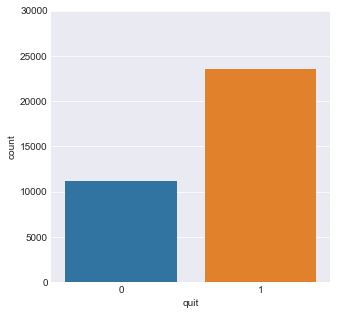

In [8]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(5, 5))
fig=sns.countplot(x="quit",data=data)
fig.axis(ymin=0, ymax=30000);

Class imbalance, so we will oversample the minority class after train/test split.

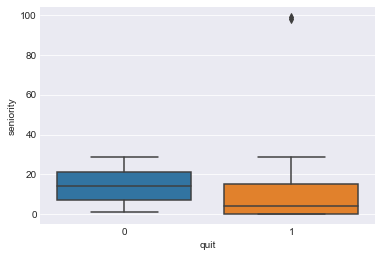

In [9]:
sns.boxplot(x=data['quit'], y='seniority', data=data)

In [10]:
# Removing outliers manually
data = data.drop(data[(data['seniority']>80)].index).reset_index(drop=True)


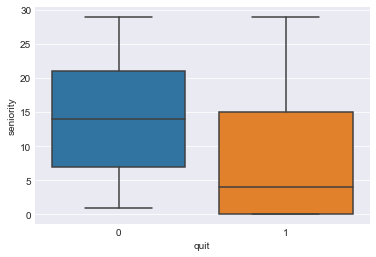

In [11]:
sns.boxplot(x=data['quit'], y='seniority', data=data)

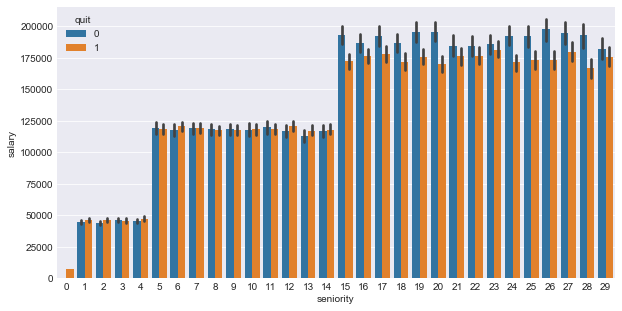

In [12]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.barplot(x=data['seniority'], y=data['salary'], hue='quit', data=data)

As one expects, salary tracks with seniority level. But something interesting emerges when we begin to look at higher seniority levels. Specifically, at higher seniority levels we can see a distinction emerge in the salaries of individuals who quit being lower than that of individuals who did not quit. Clearly there are some interesting interactions among features that can be explored.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Salary distribution')

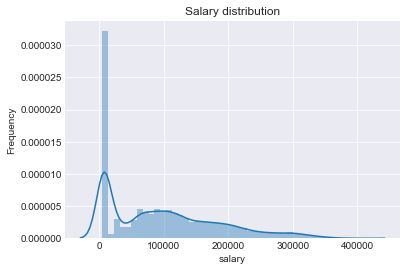

In [13]:
sns.distplot(data['salary'])
plt.ylabel('Frequency')
plt.title('Salary distribution')

In [14]:
data.salary.describe()

count     34700.000000
mean     100188.783890
std       87023.961943
min        5000.000000
25%        9335.750000
50%       88000.000000
75%      157000.000000
max      408000.000000
Name: salary, dtype: float64

In [15]:
low_salary = data[data['salary']<10000]
print(low_salary.dept.value_counts())
print(low_salary.dept.value_counts().values[0]/len(data))

temp_contractor    10000
Name: dept, dtype: int64
0.2881844380403458


In [16]:
temp = data[data['dept']=='temp_contractor']
temp.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_d,quit_d,length,years,join_month,quit
0,0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008-01-26,2008-04-25,90 days,0.246575,1,1
4,4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008-07-20,2008-10-18,90 days,0.246575,7,1
17,17,1007464.0,7,temp_contractor,0,7748.0,2009-11-14,2010-02-12,2009-11-14,2010-02-12,90 days,0.246575,11,1
18,18,1002775.0,3,temp_contractor,0,7424.0,2008-01-14,2008-04-13,2008-01-14,2008-04-13,90 days,0.246575,1,1
20,20,1000103.0,5,temp_contractor,0,9684.0,2008-05-18,2008-08-16,2008-05-18,2008-08-16,90 days,0.246575,5,1


In [17]:
data = data.drop(data[(data['dept']=='temp_contractor')].index).reset_index(drop=True)

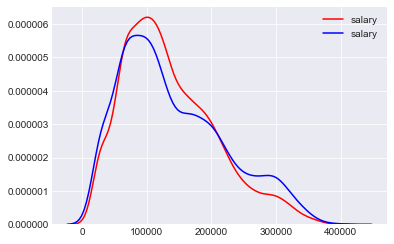

In [18]:
jobq = data[data['quit']==1]
jobnq = data[data['quit']==0]
sns.kdeplot(jobq['salary'], color='red')
sns.kdeplot(jobnq['salary'], color='blue')

In [19]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["salary"] = np.log1p(data["salary"])

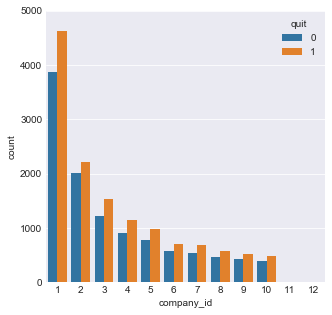

In [20]:
f, ax = plt.subplots(figsize=(5, 5))
fig=sns.countplot(x="company_id",hue="quit",data=data)
fig.axis(ymin=0, ymax=5000);

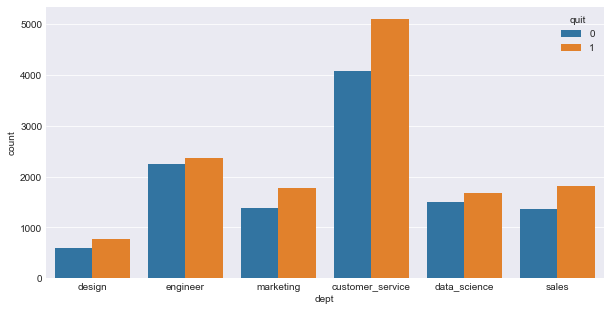

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
fig=sns.countplot(x=data['dept'],hue='quit', data=data)

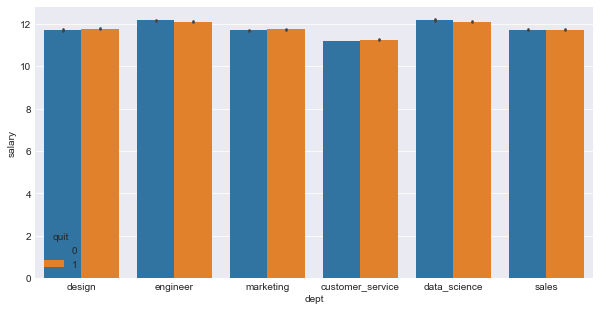

In [22]:
f, ax = plt.subplots(figsize=(10, 5))
fig=sns.barplot(x=data['dept'],y='salary', hue='quit', data=data)

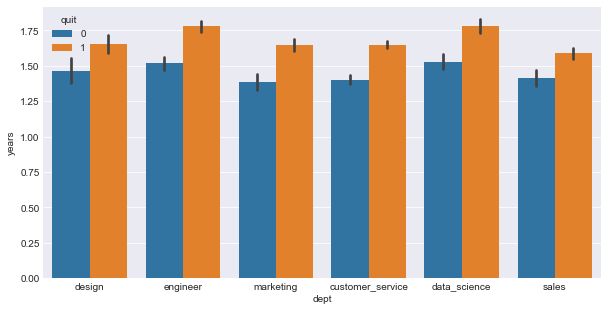

In [23]:
f, ax = plt.subplots(figsize=(10, 5))
fig=sns.barplot(x=data['dept'],y='years', hue='quit', data=data)

In itself, department doesn't seem to be telling us much. But engineers and data scientists tend to spend a longer time with the company before deciding to quit. Sales employees have a higher turnover rate and tend to quit after a shorter duration.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Years before quit distribution')

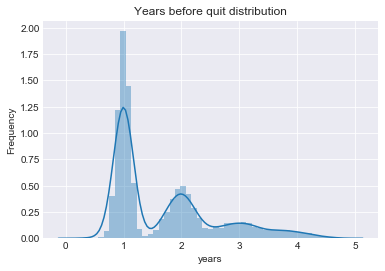

In [24]:
quits = data[data['quit']==1]
sns.distplot(quits['years'])
plt.ylabel('Frequency')
plt.title('Years before quit distribution')

Most people tend to quit within their first year on the job and also within their first two years. As we will see later on this tends to be a critical feature in driving classification.

Text(0.5,1,'Quits after 1 year')

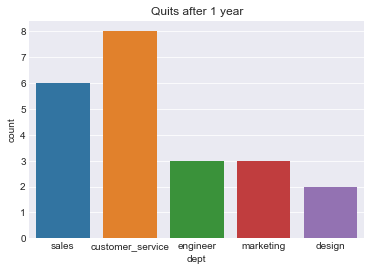

In [25]:
quits = data[data['quit']==1]
quits = quits[quits['years']==1]
sns.countplot(x='dept', data=quits)
plt.title('Quits after 1 year')

Sales and customer_service have the highest turnover rate for 1 year with the company. This tends to make intuitive sense...

Text(0.5,1,'Quits after 2 years')

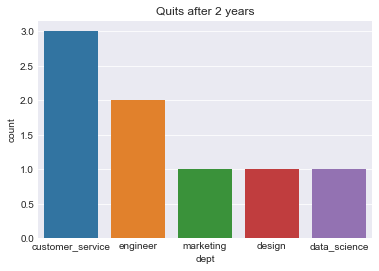

In [26]:
quits = data[data['quit']==1]
quits = quits[quits['years']==2]
sns.countplot(x='dept', data=quits)
plt.title('Quits after 2 years')

At the two year mark, we now see engineers starting to quit as well.

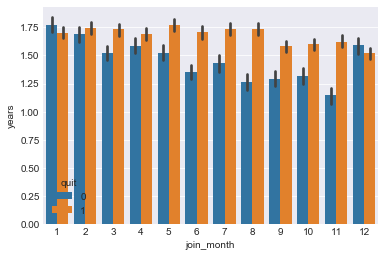

In [27]:
sns.barplot(x=data['join_month'],y=data['years'],hue='quit', data=data)

In [28]:
# Select a subset of the relevant features that can be used for the model.
X = data[['company_id','dept','salary','seniority','join_month','years']]
y = data['quit']

In [29]:
X = pd.get_dummies(X)
print(X.shape)
X.head()

(24700, 11)


,company_id,salary,seniority,join_month,years,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,8,12.160034,21,5,0.832877,0,0,1,0,0,0
1,3,11.407576,9,3,3.041096,0,0,1,0,0,0
2,2,12.604852,20,4,1.813699,0,0,0,1,0,0
3,5,12.100718,20,6,1.454795,0,0,0,0,1,0
4,3,11.686887,18,7,1.736986,1,0,0,0,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=442)

In [31]:
train = X_train
train['target']=y_train.values
train.target.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    10732
0     9028
Name: target, dtype: int64

In [32]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.target==1]
df_minority = train[train.target==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10732,    # 10821 to match majority class
                                 random_state=133) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

1    10732
0    10732
Name: target, dtype: int64

In [33]:
y=df_upsampled['target']
X=df_upsampled.drop(['target'], axis=1)
X_train_r = df_upsampled.drop(['target'], axis=1)
y_train_r = df_upsampled['target']
X_train_r.head()

,company_id,salary,seniority,join_month,years,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
7674,1,11.251574,11,4,0.997260,1,0,0,0,0,0
7959,1,11.751950,26,11,0.835616,1,0,0,0,0,0
14897,9,12.175619,27,6,0.920548,0,0,0,1,0,0
21681,4,11.502885,11,12,0.835616,0,0,0,0,0,1
7261,8,12.354497,22,12,0.871233,0,1,0,0,0,0


In [34]:
 # Import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
 
# Set up random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the random forest (use ravel to coerce to 1d array)
clf.fit(X_train_r, y_train_r.ravel())

# Get test predictions
clf.score(X_test, y_test)

0.8615384615384616

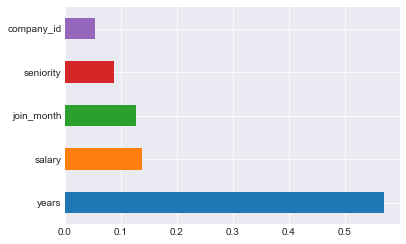

In [35]:
with sns.axes_style("darkgrid"):
    feat_importances = pd.Series(clf.feature_importances_, index=X_train_r.columns)
    feat_importances.nlargest(5).plot(kind='barh')

Clearly the number of years that you are at a company is an important predictor of churn. Companies can add incentives (e.g. bonus, since salary also is an important factor here) or interventions at the 1 and 2 year marks to try and prevent employees from quitting.

In [37]:
probs = clf.predict(X_test)
yhat = [round(value) for value in probs]

AUC: 0.856


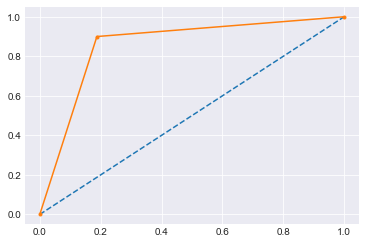

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()